In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [8]:
boundary_shapefile = gpd.read_file("Desktop/ken_adm_iebc_20191031_shp/ken_admbnda_adm2_iebc_20191031.shp")

In [9]:
sba_data = gpd.read_file("Desktop/predicted_data/subset_data.shp")

In [10]:
joined_data = gpd.sjoin(sba_data, boundary_shapefile, how='left', op='within')

/home/kennankole/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


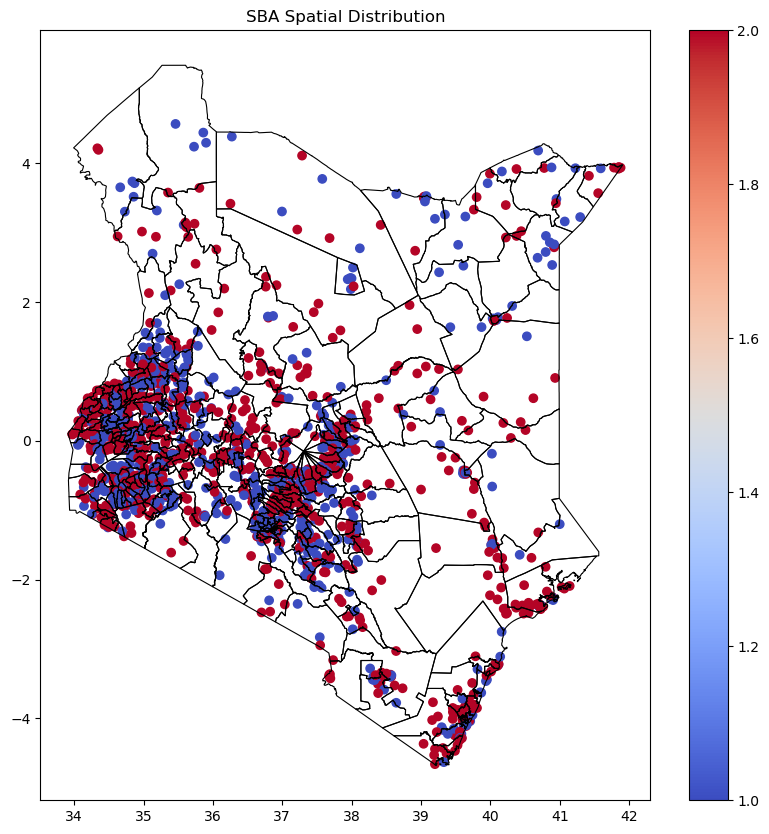

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
joined_data.plot(ax=ax, column='SBA', cmap='coolwarm', legend=True)
boundary_shapefile.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Set the plot title
plt.title('SBA Spatial Distribution')
plt.savefig('Desktop/predicted_data/SBA_prediction_points_map.png', dpi=300)

# Display the plot
plt.show()

In [53]:
joined_data.head()

,educatn,hd_f_fm,wlth_nd,residnc,wmn_l__,wrk_stt,hsbnd__,brth_rd,trvl_tm,NTL,...,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo
0,2.0,2.0,2.0,1.0,63.0,1.0,2.0,2.0,0.767997,0.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
1,2.0,2.0,2.0,1.0,63.0,1.0,2.0,1.0,0.328775,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
2,1.0,2.0,2.0,1.0,90.0,1.0,2.0,1.0,0.885867,0.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
3,2.0,2.0,2.0,1.0,33.0,0.0,0.0,2.0,2.501546,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
4,2.0,2.0,2.0,1.0,33.0,0.0,0.0,1.0,0.767997,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN


In [32]:
joined_data.head()

,educatn,hd_f_fm,wlth_nd,residnc,wmn_l__,wrk_stt,hsbnd__,brth_rd,trvl_tm,NTL,...,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo
0,2.0,2.0,2.0,1.0,63.0,1.0,2.0,2.0,0.767997,0.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
1,2.0,2.0,2.0,1.0,63.0,1.0,2.0,1.0,0.328775,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
2,1.0,2.0,2.0,1.0,90.0,1.0,2.0,1.0,0.885867,0.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
3,2.0,2.0,2.0,1.0,33.0,0.0,0.0,2.0,2.501546,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN
4,2.0,2.0,2.0,1.0,33.0,0.0,0.0,1.0,0.767997,1.0,...,NaN,NaN,NaN,Nairobi,KE047,Kenya,KE,2017-11-03,2019-10-31,NaN


In [36]:
columns = ['ADM2_REF', 'ADM2ALT1EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'ValidTo','ADM2_PCODE', 'ADM2ALT2EN', 'predctd', 'index_right']
new_joined = joined_data.drop(columns=columns)

In [40]:
aggregated_data = new_joined.groupby('ADM2_EN')['SBA'].mean().reset_index()

In [54]:
aggregated_data.head()

,ADM2_EN,SBA
0,Ainabkoi,1.600000
1,Ainamoi,1.714286
2,Aldai,1.600000
3,Alego Usonga,1.777778
4,Awendo,1.600000


In [42]:
merged_data = boundary_shapefile.merge(aggregated_data, on='ADM2_EN', how='left')

In [52]:
merged_data.to_file('Desktop/ken_adm_iebc_20191031_shp/predicted_SBA.shp')

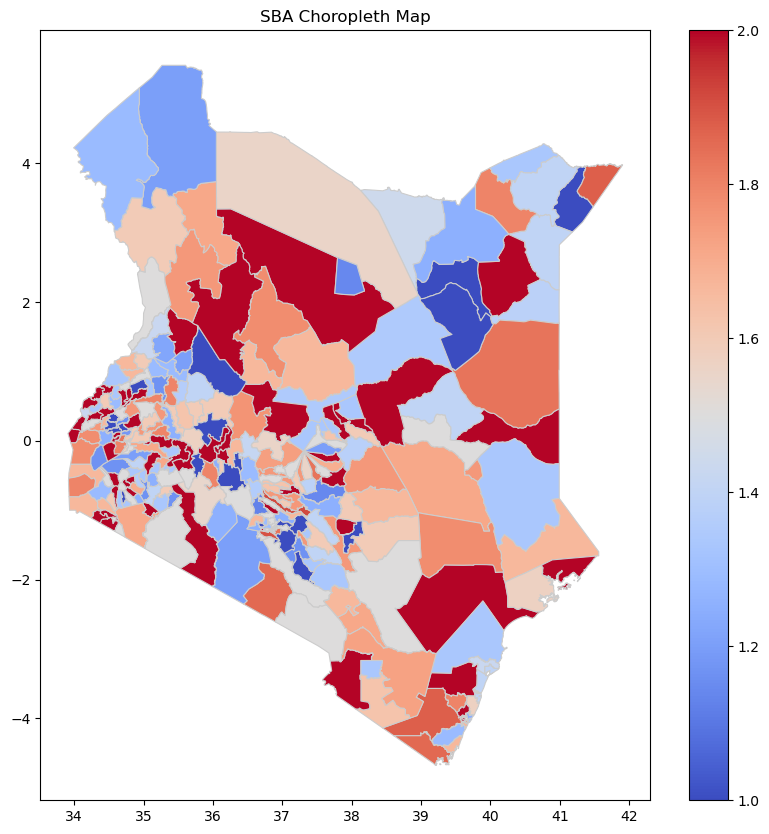

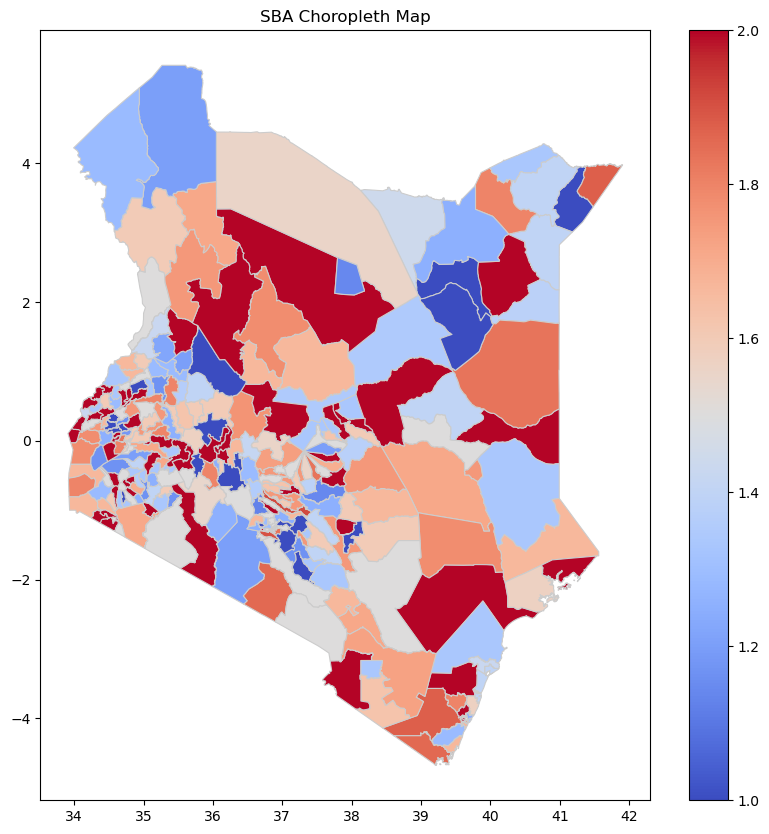

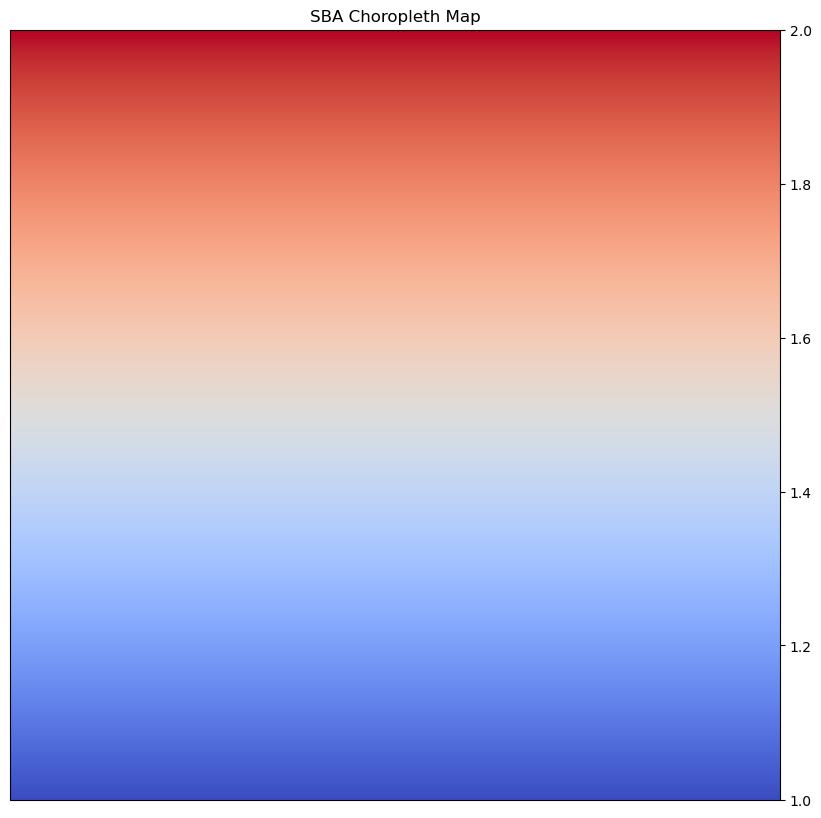

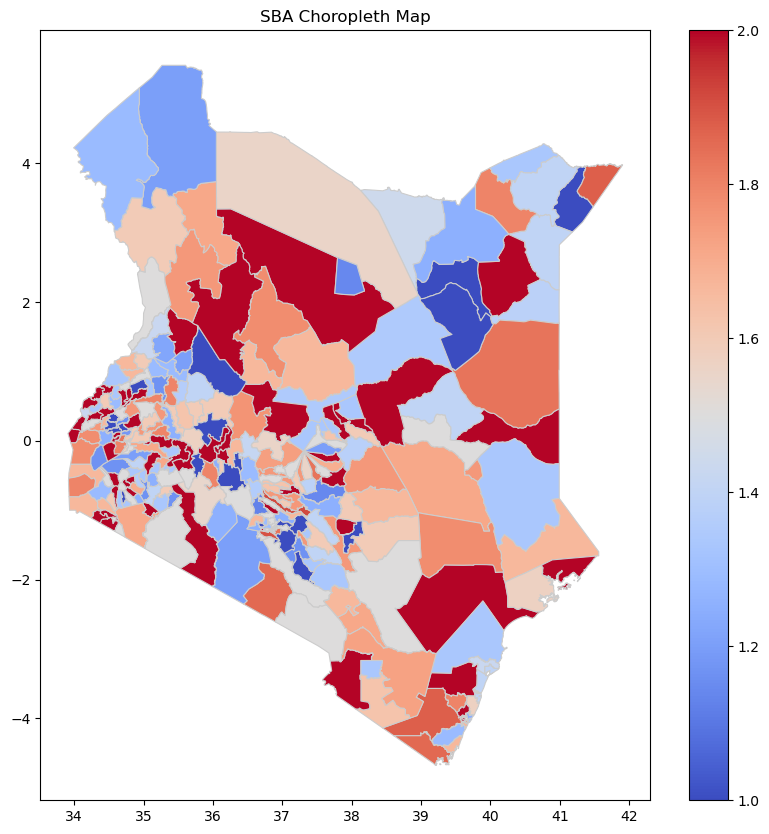

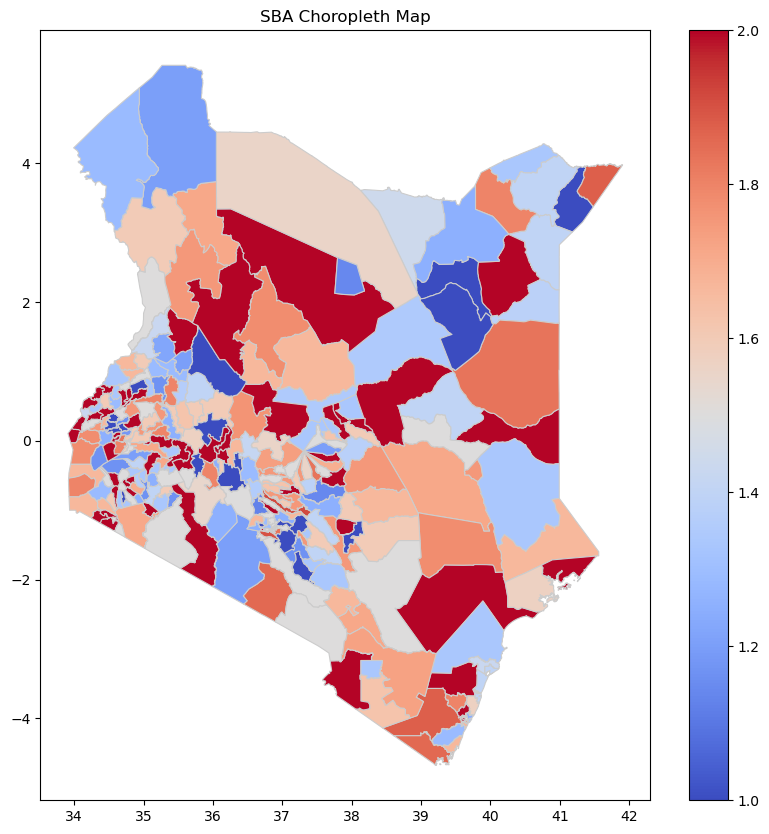

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create the choropleth map
merged_data.plot(column='SBA', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('SBA Choropleth Map')
plt.savefig('Desktop/predicted_data/SBA_prediction_map.png', dpi=300)
# Show the plot
plt.show()